In [41]:
#data handling/modeling
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.externals.six import StringIO
import scipy.stats as stats

# visualization
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from IPython.display import Image
#import pydotplus
from sklearn.tree import export_graphviz

import warnings; warnings.simplefilter('ignore')


from sklearn import linear_model
from sklearn import metrics
from sklearn.cross_validation import train_test_split


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
#read in survey data and drop misc. columns
surveyData = pd.read_csv("OSMI Mental Health in Tech Survey 2017.csv")
print(surveyData.shape)
surveyData = surveyData.drop(['#', '<strong>Do you have previous employers?</strong>', '<strong>Are you self-employed?</strong>', 'Network ID', 'Start Date (UTC)', 'Submit Date (UTC)'], axis = 1)
print(surveyData.shape)

#how many respondents answered all questions?
all_row = surveyData.dropna(axis=0)
print(all_row.shape)

#how many questions were answered by all respondents 
all_col = surveyData.dropna(axis=1)
print(all_col.shape)

surveyData.head()

(756, 123)
(756, 117)
(0, 117)
(756, 8)


,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Have you ever discussed your mental health with your employer?,"Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.",Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,Describe the conversation with coworkers you had about your mental health including their reactions.,Have you ever had a coworker discuss their or another coworker's mental health with you?,Describe the conversation your coworker had with you about their mental health (please do not use names).,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?,Do you know local or online resources to seek help for a mental health issue?,"<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?</strong>","If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?</strong>","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Was your employer primarily a tech company/organization?,<strong>Have your previous employers provided mental health benefits?</strong>,<strong>Were you aware of the options for mental health care provided by your previous employers?</strong>,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?,Would you have been willing to discuss your mental health with your direct supervisor(s)?,Did you ever discuss your mental health with your previous employer?,"Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.",<strong>Would you have been willing to discuss your ment

(756, 58)


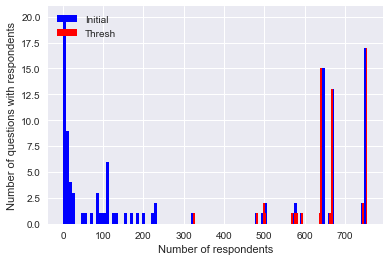

In [5]:
surveyData_resp_counts = surveyData.count(axis = 0).sort_values()
surveyData_resp_counts.hist(bins = 100, color="blue", label = 'Initial')
plt.xlabel('Number of respondents')
plt.ylabel('Number of questions with respondents')
plt.legend(loc='upper left')

surveyData_resp_thresh = surveyData.dropna(axis=1, thresh=300)
print(surveyData_resp_thresh.shape)

surveyData_resp_thresh_counts = surveyData_resp_thresh.count(axis = 0).sort_values()
surveyData_resp_thresh_counts.hist(bins = 100, color="red", label = 'Thresh')
plt.legend(loc='upper left')

In [6]:
#print(surveyData_resp_thresh.info())
surveyData_resp_thresh.head()

,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Have you ever discussed your mental health with your employer?,Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,Have you ever had a coworker discuss their or another coworker's mental health with you?,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Was your employer primarily a tech company/organization?,<strong>Have your previous employers provided mental health benefits?</strong>,<strong>Were you aware of the options for mental health care provided by your previous employers?</strong>,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?,Would you have been willing to discuss your mental health with your direct supervisor(s)?,Did you ever discuss your mental health with your previous employer?,<strong>Would you have been willing to discuss your mental health with your coworkers at previous employers?</strong>,Did you ever discuss your mental health with a previous coworker(s)?,Did you ever have a previous coworker discuss their or another coworker's mental health with you?,"Overall, how much importance did your previous employer place on physical health?","Overall, how much importance did your previous employer place on mental health?",Do you currently have a mental health disorder?,Have you ever been diagnosed with a mental health disorder?,Have you had a mental health disorder in the past?,Have you ever sought treatment for a mental health disorder from a mental health professional?,Do you have a family history of mental illness?,"If you have a mental health disorder, how often do you feel that it interferes with your work <strong>when being treated effectively?</strong>","If you have a mental health disorder, how often do you feel that it interferes with your work <strong>when <em>NOT</em> being treated effectively (i.e., when you are experiencing symptoms)?</strong>",Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?,How willing would you be to share with friends and family that you have a mental illness?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up your mental health with a potential employer in an interview?,Why or

In [7]:
why = surveyData_resp_thresh.filter(like='Why', axis=1).columns.values
briefly  = surveyData_resp_thresh.filter(like='Briefly ', axis=1).columns.values

In [8]:
surveyData_resp_thresh.drop(why, inplace=True, axis=1)
surveyData_resp_thresh.drop(briefly, inplace=True, axis=1)

In [9]:
surveyData_cont = surveyData_resp_thresh.select_dtypes(include=['float', 'int']).copy()
surveyData_cont.head()

,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Have you ever discussed your mental health with your employer?,Have you ever discussed your mental health with coworkers?,Have you ever had a coworker discuss their or another coworker's mental health with you?,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Was your employer primarily a tech company/organization?,Did you ever discuss your mental health with your previous employer?,Did you ever discuss your mental health with a previous coworker(s)?,Did you ever have a previous coworker discuss their or another coworker's mental health with you?,"Overall, how much importance did your previous employer place on physical health?","Overall, how much importance did your previous employer place on mental health?",Are you openly identified at work as a person with a mental health issue?,"If they knew you suffered from a mental health disorder, how do you think that team members/co-workers would react?","Overall, how well do you think the tech industry supports employees with mental health issues?",Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used <em>anonymously</em> and only with your permission.),What is your age?
0,1.0,1.0,0.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,10.0,1.0,0.0,27.0
1,1.0,1.0,0.0,1.0,1.0,7.0,2.0,1.0,0.0,1.0,0.0,5.0,2.0,0.0,6.0,2.0,0.0,31.0
2,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,8.0,0.0,1.0,5.0,1.0,1.0,36.0
3,1.0,1.0,1.0,1.0,0.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.0,2.0,0.0,22.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,8.0,8.0,0.0,4.0,1.0,1.0,52.0


In [10]:
surveyData_cat = surveyData_resp_thresh.select_dtypes(include=['object']).copy()
surveyData_cat.head()

,How many employees does your company or organization have?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Would you feel comfortable discussing a mental health issue with your coworkers?,<strong>Have your previous employers provided mental health benefits?</strong>,<strong>Were you aware of the options for mental health care provided by your previous employers?</strong>,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?,Would you have been willing to discuss your mental health with your direct supervisor(s)?,<strong>Would you have been willing to discuss your mental health with your coworkers at previous employers?</strong>,Do you currently have a mental health disorder?,Have you ever been diagnosed with a mental health disorder?,Have you had a mental health disorder in the past?,Do you have a family history of mental illness?,"If you have a mental health disorder, how often do you feel that it interferes with your work <strong>when being treated effectively?</strong>","If you have a mental health disorder, how often do you feel that it interferes with your work <strong>when <em>NOT</em> being treated effectively (i.e., when you are experiencing symptoms)?</strong>",Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Would you bring up your mental health with a potential employer in an interview?,<strong>Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?</strong>,<strong>Have you observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace?</strong>,What is your gender?,What country do you <strong>live</strong> in?,What US state or territory do you <strong>live</strong> in?,What is your race?,What country do you <strong>work</strong> in?,What US state or territory do you <strong>work</strong> in?
0,100-500,No,Yes,No,I don't know,I don't know,I don't know,Same level of comfort for each,Yes,Yes,I don't know,N/A (was not aware),Some did,Some did,"Yes, always",Physical health,"Yes, all of my previous supervisors","No, at none of my previous employers",Possibly,NaN,Possibly,No,Sometimes,Sometimes,No,Yes,No,"Yes, I experienced","Yes, I experienced",Female,United Kingdom,NaN,NaN,United Kingdom,NaN
1,100-500,Yes,Yes,No,No,I don't know,I don't know,Same level of comfort for each,Maybe,Yes,Some did,I was aware of some,None did,None did,I don't know,Physical health,"No, none of my p

In [11]:
surveyData = surveyData_resp_thresh.copy()
surveyData['Gender_old'] = surveyData['What is your gender?']
surveyData['What is your gender?'] = surveyData['What is your gender?'].fillna('NaN')
surveyData['What is your gender?'] = surveyData['What is your gender?'].str.replace('^[f].*', 'F', case=False)
surveyData['What is your gender?'] = surveyData['What is your gender?'].str.replace('^[w].*', 'F', case=False)
surveyData['What is your gender?'] = surveyData['What is your gender?'].str.replace('^[md][^y].*', 'M', case=False)
surveyData['What is your gender?'] = surveyData['What is your gender?'].str.replace('^[ngau][egho][nhe].*', 'NB', case=False)
surveyData['What is your gender?'] = surveyData['What is your gender?'].str.replace('^[c][i][s].{1,2}[mh].*', 'M', case=False)
surveyData['What is your gender?'] = surveyData['What is your gender?'].str.replace('^[c][i][s].{1,2}[f].*', 'F', case=False)
surveyData['What is your gender?'] = surveyData['What is your gender?'].str.replace('^[t].*', 'T', case=False)
surveyData['What is your gender?'] = surveyData['What is your gender?'].str.replace('^[sgcm][yo][ nmd].*', 'NaN', case=False)
surveyData['What is your gender?'] = surveyData['What is your gender?'].str.replace('\\\-', 'NaN', case=False)
surveyData['What is your gender?'] = surveyData['What is your gender?'].str.replace('n/a', 'NaN', case=False)
surveyData['What is your gender?'] = surveyData['What is your gender?'].str.replace('m', 'M', case=False)
surveyData['What is your gender?'].value_counts()

M      504
F      219
NaN     18
NB      13
T        2
Name: What is your gender?, dtype: int64

In [12]:
size = surveyData['How many employees does your company or organization have?']
size = size.fillna('NaN')
size_cont = []
for i, row in size.iteritems():
    if row == '6-25':
        size = 15
        size_cont.append(size)
    if row == '100-500':
        size = 250
        size_cont.append(size)
    if row == 'NaN':
        size = None
        size_cont.append(size)
    if row == '26-100':
        size = 75
        size_cont.append(size)
    if row == '500-1000':
        size = 750
        size_cont.append(size)
    if row == 'More than 1000':
        size = 1000
        size_cont.append(size)
    if row == '1-5':
        size = 3
        size_cont.append(size)

len(size_cont)

surveyData['Org_size'] = size_cont
print(surveyData['Org_size'].unique())
print(surveyData['Org_size'].value_counts())

[  250.    15.  1000.    nan    75.     3.   750.]
250.0     203
1000.0    158
75.0      128
15.0       86
750.0      48
3.0        20
Name: Org_size, dtype: int64


In [13]:
print(surveyData["What is your gender?"].unique())
ordered_gender = ['NaN', 'T', 'NB', 'F', 'M']
surveyData['Gender_cat'] = surveyData["What is your gender?"].astype('category', ordered=True,
  categories=ordered_gender).cat.codes
print(surveyData['Gender_cat'].unique())
print(surveyData['Gender_cat'].value_counts())

['F' 'M' 'NaN' 'NB' 'T']
[3 4 0 2 1]
4    504
3    219
0     18
2     13
1      2
Name: Gender_cat, dtype: int64


In [14]:
print(surveyData["Do you currently have a mental health disorder?"].unique())
ordered_MH = ['No', 'Don\'t know', 'Possibly', 'Yes']
surveyData['MH_status'] = surveyData["Do you currently have a mental health disorder?"].astype('category', ordered=True,
  categories=ordered_MH).cat.codes
print(surveyData['MH_status'].unique())
print(surveyData['MH_status'].value_counts())

['Possibly' 'Yes' 'No' "Don't Know"]
[ 2  3  0 -1]
 3    324
 0    222
 2    144
-1     66
Name: MH_status, dtype: int64


In [15]:
surveyData_short = surveyData[['Org_size', 'What is your age?', 'MH_status', 'Gender_cat', 'Overall, how much importance does your employer place on physical health?', 'Overall, how much importance does your employer place on mental health?', 'How willing would you be to share with friends and family that you have a mental illness?', 'Is your employer primarily a tech company/organization?', 'Is your primary role within your company related to tech/IT?', 'Overall, how well do you think the tech industry supports employees with mental health issues?']].dropna(axis =0)
surveyData_short.rename(columns={'Overall, how much importance does your employer place on physical health?': 'Emp_PH', 'What is your age?': 'Age', 'Is your employer primarily a tech company/organization?': 'Emp_type', 'Is your primary role within your company related to tech/IT?': 'Role', 'Overall, how well do you think the tech industry supports employees with mental health issues?': 'Tech_support'}, inplace=True)
surveyData_short.rename(columns={'Overall, how much importance does your employer place on mental health?': 'Emp_MH'}, inplace=True)
surveyData_short.rename(columns={'How willing would you be to share with friends and family that you have a mental illness?': 'Willingness'}, inplace=True)
surveyData_short = surveyData_short[surveyData_short['MH_status'] > -1]
surveyData_short = surveyData_short[surveyData_short['Gender_cat'] > 0]
print(surveyData_short.shape)
surveyData_short.head()

(577, 10)


,Org_size,Age,MH_status,Gender_cat,Emp_PH,Emp_MH,Willingness,Emp_type,Role,Tech_support
0,250.0,27.0,2,3,6.0,0.0,5,1.0,1.0,1.0
1,250.0,31.0,2,4,7.0,2.0,4,1.0,1.0,2.0
2,15.0,36.0,3,4,0.0,1.0,5,1.0,1.0,1.0
3,1000.0,22.0,3,4,7.0,5.0,10,1.0,1.0,2.0
5,250.0,30.0,0,4,9.0,5.0,5,1.0,0.0,2.0


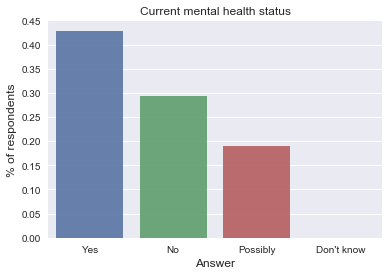

In [19]:
curr_mh = surveyData_cat['Do you currently have a mental health disorder?'].value_counts(normalize=True)
sns.barplot(curr_mh.index, curr_mh.values,  alpha=0.9 , order = ['Yes', 'No', 'Possibly', 'Don\'t know'])
plt.title('Current mental health status')
plt.ylabel('% of respondents', fontsize=12)
plt.xlabel('Answer', fontsize=12)
plt.show()

In [ ]:
mh_by_size= surveyData_cat.groupby('How many employees does your company or organization have?')['Do you currently have a mental health disorder?'].value_counts(normalize=True)
sns.barplot(mh_by_size.index, mh_by_size.values,  alpha=0.9)
plt.title('Current mental health status across company sizes')
plt.ylabel('% of respondents', fontsize=12)
plt.xlabel('Answer', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [ ]:
mh_by_options= surveyData_cat.groupby('Do you currently have a mental health disorder?')['Do you know the options for mental health care available under your employer-provided health coverage?'].value_counts(normalize=True)
sns.barplot(mh_by_options.index, mh_by_options.values,  alpha=0.9, order = answers)
plt.title('Mental health status and knowledge of mental health options')
plt.ylabel('% of respondents', fontsize=12)
plt.xlabel('Answer', fontsize=12)
plt.xticks(rotation=90)
mental = surveyData_cat['Do you currently have a mental health disorder?'].unique()
options = surveyData_cat['Do you know the options for mental health care available under your employer-provided health coverage?'].unique()
options = options[0:2]
mental = [mental[1], mental[2]]
answers = ((mental[0], options[0]), (mental[0], options[1]), (mental[1], options[0]), (mental[1], options[1]))
plt.show()

In [ ]:
willingness = surveyData.groupby('Do you currently have a mental health disorder?')['How willing would you be to share with friends and family that you have a mental illness?'].median()
sns.barplot(willingness.index, willingness.values,  alpha=0.9, order = ['Yes', 'No', 'Possibly', 'Don\'t know'])
plt.title('Willingness to share across mental health status')
plt.ylabel('Median willingenss', fontsize=12)
plt.xlabel('Do you currently have a mental health disorder?', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [ ]:
surveyData_cont_clean = surveyData[['Org_size', 'Gender_cat', 'What is your age?', 'Overall, how much importance does your employer place on physical health?', 'Overall, how much importance does your employer place on mental health?', 'How willing would you be to share with friends and family that you have a mental illness?', 'Overall, how well do you think the tech industry supports employees with mental health issues?', 'MH_status']]
surveyData_cont_clean['How willing would you be to share with friends and family that you have a mental illness?'].unique()


In [ ]:
sns.regplot(y="MH_status", x="What is your age?", data=surveyData_final)

In [ ]:
sns.regplot(y="MH_status", x="Gender_cat", data=surveyData_final)

In [ ]:
#sns.regplot(y="MH_status", x="Org_size", data=surveyData_final)
sns.regplot(y="MH_status", x="Org_size", data=surveyData_final,  x_estimator=np.mean)

In [ ]:
#sns.regplot(y="MH_status", x="Org_size", data=surveyData_final)
sns.regplot(y="MH_status", x="Overall, how well do you think the tech industry supports employees with mental health issues?", data=surveyData_final,  x_estimator=np.mean)

In [20]:
auto_correlations = surveyData_short.corr()
auto_correlations

,Org_size,Age,MH_status,Gender_cat,Emp_PH,Emp_MH,Willingness,Emp_type,Role,Tech_support
Org_size,1.000000,0.169769,0.112452,-0.035173,0.162457,0.012509,0.011157,-0.263648,0.099256,-0.047329
Age,0.169769,1.000000,-0.075928,0.078029,0.000379,-0.003091,0.010733,-0.080069,0.019778,-0.145293
MH_status,0.112452,-0.075928,1.000000,-0.157907,0.007022,-0.068129,0.191245,-0.079220,0.014980,-0.082109
Gender_cat,-0.035173,0.078029,-0.157907,1.000000,-0.155139,-0.080675,-0.029240,-0.020680,0.140224,-0.033364
Emp_PH,0.162457,0.000379,0.007022,-0.155139,1.000000,0.555568,0.145525,0.016816,-0.063867,0.201091
Emp_MH,0.012509,-0.003091,-0.068129,-0.080675,0.555568,1.000000,0.166759,0.162424,-0.166244,0.352425
Willingness,0.011157,0.010733,0.191245,-0.029240,0.145525,0.166759,1.000000,0.016490,0.043861,0.168376
Emp_type,-0.263648,-0.080069,-0.079220,-0.020680,0.016816,0.162424,0.016490,1.000000,-0.049626,0.034279
Role,0.099256,0.019778,0.014980,0.140224,-0.063867,-0.166244,0.043861,-0.049626,1.000000,-0.126316
Tech_support,-0.047329,-0.145293,-0.082109,-0.033364,0.201091,0.352425,0.168376,0.034279,-0.126316,1.000000


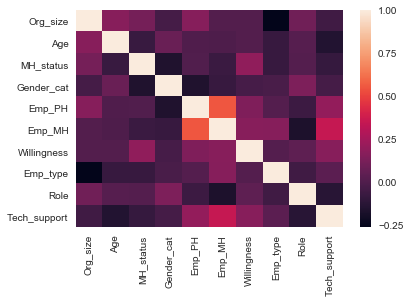

In [21]:
sns.heatmap(auto_correlations)

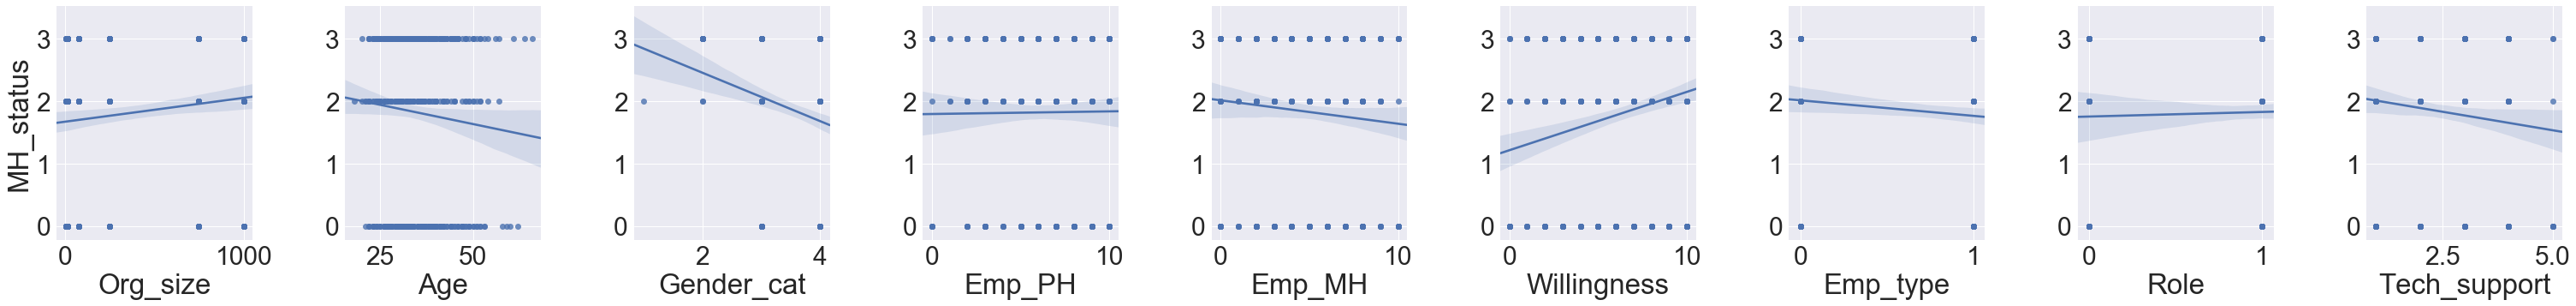

In [22]:
sns.set(font_scale=3)
sns.pairplot(surveyData_short, x_vars = ['Org_size', 'Age', 'Gender_cat', 'Emp_PH', 'Emp_MH', 'Willingness', 'Emp_type', 'Role', 'Tech_support'], y_vars = ['MH_status'], kind = "reg", size=6, aspect=0.8)

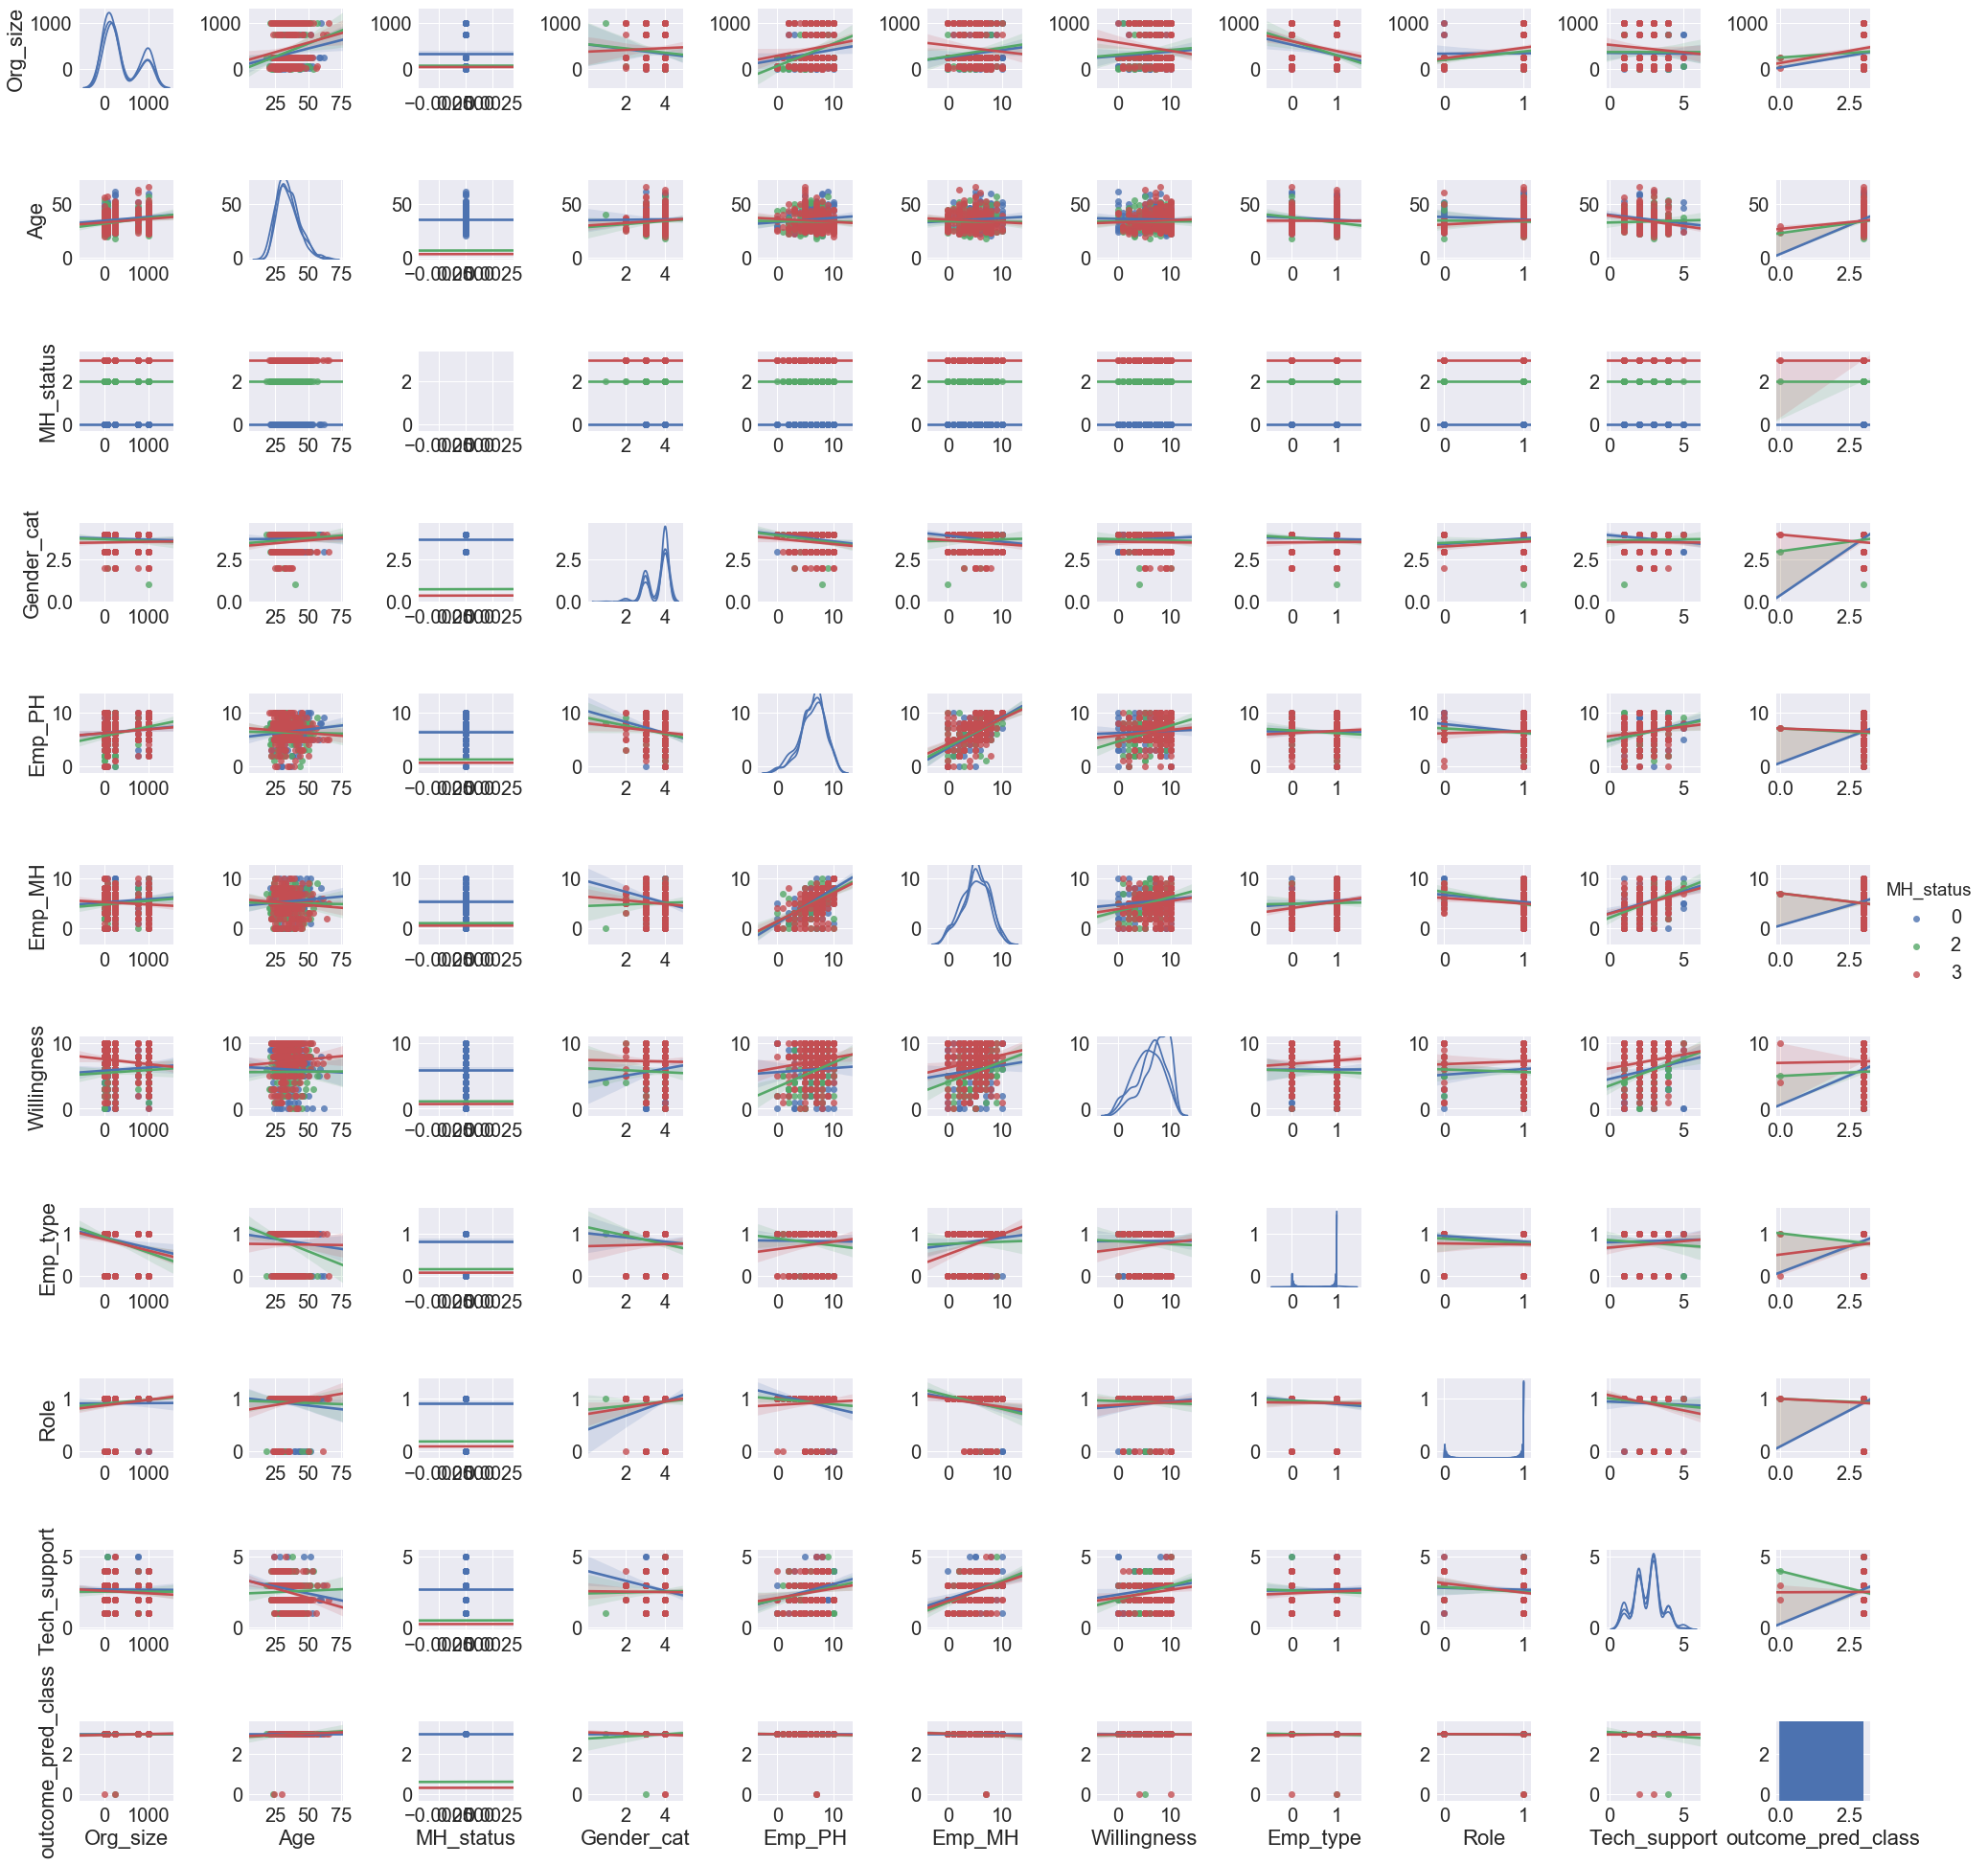

In [94]:
sns.set(font_scale=2)
sns.pairplot(surveyData_short, hue = 'MH_status', diag_kind = 'kde', kind = 'reg')

In [23]:
X = surveyData_short[['Org_size', 'Age', 'Gender_cat', 'Emp_PH', 'Emp_MH', 'Willingness', 'Emp_type', 'Role', 'Tech_support']]
y = surveyData_short.MH_status

In [24]:
# fit a linear regression model and store the predictions
feature_cols = ['Age']
X = surveyData_short[feature_cols]
y = surveyData_short.MH_status
# Instantiate and fit the Linear regression object
linreg = LinearRegression()
linreg.fit(X, y)
# predict outcomes
outcome_pred = linreg.predict(X)

In [25]:
y_pred = linreg.predict(X)
metrics.r2_score(y, y_pred)

0.0057651224887387276

In [26]:
mae = metrics.mean_absolute_error(y_pred, y)
mse = metrics.mean_squared_error(y_pred, y)
rmse = np.sqrt(mse)
print('model with one feature:')
print('mae: ', mae, 'mse: ', mse, 'rmse: ', rmse)

model with one feature:
mae:  1.16732931768 mse:  1.71616450955 rmse:  1.31002462173


In [27]:
# fit a linear regression model and store the predictions
feature_cols = ['Org_size', 'Age', 'Gender_cat', 'Emp_PH', 'Emp_MH', 'Willingness', 'Emp_type', 'Role', 'Tech_support']
X_mult = surveyData_short[feature_cols]
y_mult = surveyData_short.MH_status

# Instantiate and fit the Linear regression object
linreg_m = LinearRegression()
linreg_m.fit(X_mult, y_mult)

# predict outcomes
outcome_pred_m = linreg_m.predict(X_mult)

In [28]:
y_pred_mult = linreg_m.predict(X_mult)
metrics.r2_score(y_mult, y_pred_mult)

0.10288807219408214

In [29]:
mae_m = metrics.mean_absolute_error(y_pred_mult, y)
mse_m = metrics.mean_squared_error(y_pred_mult, y)
rmse_m = np.sqrt(mse_m)
print('model with all feature:')
print('mae: ', mae_m, 'mse: ', mse_m, 'rmse: ', rmse_m)

model with all feature:
mae:  1.09888696584 mse:  1.54851905361 rmse:  1.24439505528


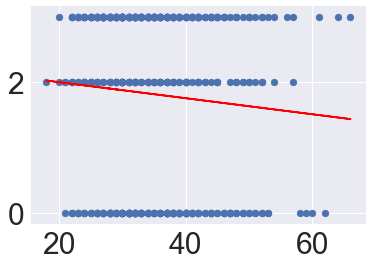

In [30]:
plt.scatter(surveyData_short.Age, surveyData_short.MH_status)
plt.plot(surveyData_short.Age, outcome_pred, color='red')

In [31]:
outcome_pred

array([ 1.91896679,  1.86969692,  1.80810959,  1.98055413,  1.88201439,
        1.80810959,  1.78347466,  1.75883972,  1.82042706,  1.96823666,
        1.98055413,  1.83274452,  1.90664932,  1.78347466,  1.99287159,
        1.98055413,  2.02982399,  1.79579212,  1.94360173,  1.43858559,
        1.86969692,  1.85737946,  1.88201439,  1.86969692,  1.68493492,
        1.90664932,  1.83274452,  1.94360173,  1.82042706,  1.75883972,
        1.85737946,  1.77115719,  1.84506199,  1.75883972,  1.73420479,
        1.85737946,  1.91896679,  1.88201439,  1.77115719,  1.73420479,
        1.79579212,  1.78347466,  1.46322052,  1.90664932,  1.79579212,
        1.88201439,  1.94360173,  1.94360173,  1.50017292,  1.93128426,
        1.70956986,  1.93128426,  1.93128426,  1.82042706,  1.69725239,
        1.96823666,  1.78347466,  1.68493492,  1.91896679,  1.77115719,
        1.84506199,  1.82042706,  1.85737946,  1.93128426,  1.63566505,
        1.86969692,  1.88201439,  1.88201439,  1.83274452,  1.73

In [32]:
# transform predictions to 1 or 0
outcome_pred_class = np.where(outcome_pred >= 1.5, 3, 0)
outcome_pred_class

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3,

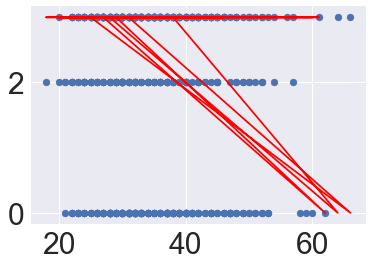

In [33]:
plt.scatter(surveyData_short.Age, surveyData_short.MH_status)
plt.plot(surveyData_short.Age, outcome_pred_class, color='red')

In [34]:
# add predicted class to DataFrame
surveyData_short['outcome_pred_class'] = outcome_pred_class

# sort DataFrame by pelvic_incidence so that the line plot makes sense
surveyData_short.sort_values('Age', inplace=True)

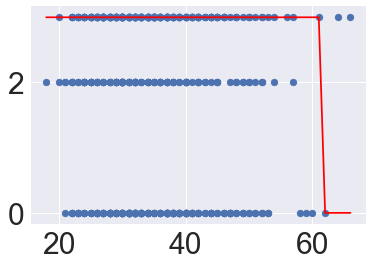

In [35]:
plt.scatter(surveyData_short.Age, surveyData_short.MH_status)
plt.plot(surveyData_short.Age, surveyData_short.outcome_pred_class, color='red')

In [36]:
# create logistic regression object
logreg = LogisticRegression(C=1e9)
# create X and y
feature_cols = ['Age']
X = surveyData_short[feature_cols]
y = surveyData_short.MH_status
#fit the model
logreg.fit(X, y)
# create predictions
outcome_pred_class_log = logreg.predict(X)

In [37]:
# print the class predictions
outcome_pred_class_log

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3,

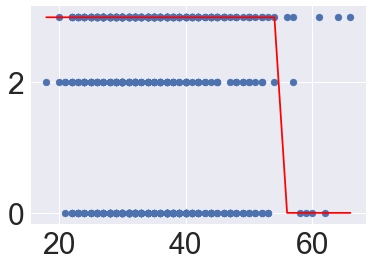

In [38]:
# plot the class predictions
plt.scatter(surveyData_short.Age, surveyData_short.MH_status)
plt.plot(surveyData_short.Age, outcome_pred_class_log, color='red')

In [39]:
# store the predicted probabilites of class 1 only
outcome_probs = logreg.predict_proba(X)[:, 1]
outcome_probs

array([ 0.26206252,  0.25564525,  0.25564525,  0.25244021,  0.25244021,
        0.25244021,  0.24923889,  0.24923889,  0.24923889,  0.24923889,
        0.24923889,  0.24923889,  0.24923889,  0.24923889,  0.24923889,
        0.24923889,  0.24923889,  0.24604228,  0.24604228,  0.24604228,
        0.24604228,  0.24604228,  0.24604228,  0.24604228,  0.24604228,
        0.24604228,  0.24604228,  0.24604228,  0.24285135,  0.24285135,
        0.24285135,  0.24285135,  0.24285135,  0.24285135,  0.24285135,
        0.24285135,  0.24285135,  0.24285135,  0.24285135,  0.24285135,
        0.24285135,  0.24285135,  0.24285135,  0.24285135,  0.2396671 ,
        0.2396671 ,  0.2396671 ,  0.2396671 ,  0.2396671 ,  0.2396671 ,
        0.2396671 ,  0.2396671 ,  0.2396671 ,  0.2396671 ,  0.2396671 ,
        0.2396671 ,  0.2396671 ,  0.2396671 ,  0.2396671 ,  0.2396671 ,
        0.2396671 ,  0.2364905 ,  0.2364905 ,  0.2364905 ,  0.2364905 ,
        0.2364905 ,  0.2364905 ,  0.2364905 ,  0.2364905 ,  0.23

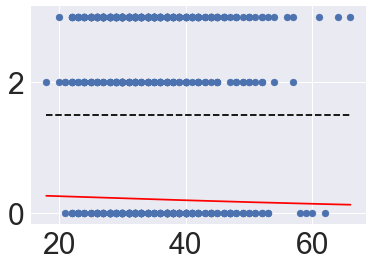

In [40]:
# plot the predicted probabilities, and the 50% line
plt.scatter(surveyData_short.Age, surveyData_short.MH_status)
plt.plot(surveyData_short.Age, outcome_probs, color='red')
plt.plot(surveyData_short.Age, np.ones(outcome_probs.shape)*1.5,'k--')

In [42]:
# create logistic regression object
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg')
# create X and y
feature_cols = ['Age']
X = surveyData_short[feature_cols]
y = surveyData_short.MH_status
#fit the model
mul_lr.fit(X, y)
outcome_pred_class_log_mul = mul_lr.predict(X)

In [43]:
y = surveyData_short.MH_status
y_pred = outcome_pred_class
print("Model accuracy:",metrics.accuracy_score(y,y_pred))

Model accuracy: 0.464471403813


In [44]:
y = surveyData_short.MH_status
y_pred = outcome_pred_class_log
print("Model accuracy:",metrics.accuracy_score(y,y_pred))

Model accuracy: 0.466204506066


In [45]:
y = surveyData_short.MH_status
y_pred = outcome_pred_class_log_mul
print("Model accuracy:",metrics.accuracy_score(y,y_pred))

Model accuracy: 0.464471403813


In [46]:
surveyData_short.head()

,Org_size,Age,MH_status,Gender_cat,Emp_PH,Emp_MH,Willingness,Emp_type,Role,Tech_support,outcome_pred_class
21,250.0,18.0,2,4,7.0,7.0,6,0.0,0.0,3.0,3
628,15.0,20.0,3,4,10.0,6.0,5,1.0,1.0,3.0,3
242,75.0,20.0,2,4,7.0,4.0,3,1.0,1.0,3.0,3
626,1000.0,21.0,2,3,8.0,4.0,3,1.0,1.0,3.0,3
18,15.0,21.0,2,4,4.0,3.0,8,1.0,1.0,3.0,3


In [47]:
feature_cols = ['Age', 'Org_size']
X = surveyData_short.drop(['MH_status', 'outcome_pred_class'], axis=1)
y = surveyData_short.MH_status

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3)


logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
logreg.coef_

array([[ -5.88042138e-04,   3.26073516e-02,   2.23766241e-01,
         -2.63621122e-02,   2.87464372e-02,  -1.39503258e-01,
          2.59638260e-02,  -1.89766726e-01,   1.79015701e-01],
       [ -3.94464380e-05,  -2.91672470e-02,   3.09595344e-01,
         -1.31519126e-01,   1.01404721e-01,  -1.61226506e-01,
          3.20429313e-02,   1.75016921e-01,  -1.46030380e-02],
       [  5.58468283e-04,  -1.96071806e-02,  -5.39934935e-01,
          9.59755151e-02,  -8.76608791e-02,   2.46054062e-01,
         -9.69054779e-02,  -9.69996498e-03,  -2.03833430e-01]])

In [49]:
outcome_predictions = logreg.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, outcome_predictions))

Accuracy:  0.494252873563


In [50]:
feature_cols = ['Age', 'Org_size']
X = surveyData_short.drop(['outcome_pred_class', 'MH_status'], axis=1)
y = surveyData_short.MH_status

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3)


logreg_mult = LogisticRegression(multi_class='multinomial', solver='newton-cg')
logreg_mult.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
logreg_mult.coef_

array([[ -5.44629207e-04,   2.15447565e-02,   4.71616261e-01,
          2.23470519e-02,   3.21013728e-02,  -7.24362620e-02,
          1.39872078e-01,   2.17272066e-01,   1.92674170e-01],
       [  4.96860657e-05,  -1.40770353e-02,   1.07217058e-01,
          2.26150968e-02,   1.50229840e-02,  -9.40862219e-02,
         -7.36515855e-02,   7.83487735e-03,  -5.23004992e-02],
       [  4.94943133e-04,  -7.46772118e-03,  -5.78833319e-01,
         -4.49621487e-02,  -4.71243568e-02,   1.66522484e-01,
         -6.62204929e-02,  -2.25106943e-01,  -1.40373671e-01]])

In [52]:
outcome_predictions = logreg_mult.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, outcome_predictions))

Accuracy:  0.488505747126


Decision Trees


In [55]:
X = surveyData_short.drop(['outcome_pred_class', 'MH_status'], axis=1)
y = surveyData_short.MH_status

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.4,random_state=20)

decision_tree = DecisionTreeRegressor(max_depth=2)
decision_tree.fit(X_train,y_train)
print("Decision Tree RMSE:",np.sqrt(mean_squared_error(y_test,decision_tree.predict(X_test))))

Decision Tree RMSE: 1.38393300804


Decision Tree Train/Test RMSE: 1.26330005231   1.33784897708
Decision Tree Train/Test RMSE: 1.2281752199   1.38393300804
Decision Tree Train/Test RMSE: 1.18888738292   1.42839244284
Decision Tree Train/Test RMSE: 1.14884982906   1.47779515256
Decision Tree Train/Test RMSE: 1.08661211446   1.52561896152
Decision Tree Train/Test RMSE: 1.01935545434   1.60973100839
Decision Tree Train/Test RMSE: 0.950544943906   1.64793521636
Decision Tree Train/Test RMSE: 0.870045150867   1.67098778088
Decision Tree Train/Test RMSE: 0.777779649024   1.72837717138
Decision Tree Train/Test RMSE: 0.669712661396   1.72574243233


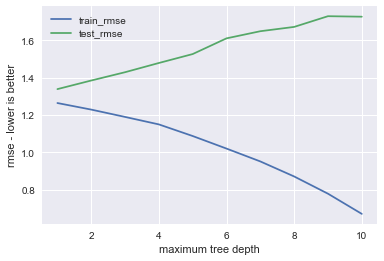

In [57]:
depths = range(1,11)
train_rmse, test_rmse = [],[]
for depth in depths:
    decision_tree = DecisionTreeRegressor(max_depth=depth,random_state=10)
    decision_tree.fit(X_train,y_train)
    curr_train_rmse = np.sqrt(mean_squared_error(y_train,decision_tree.predict(X_train)))
    curr_test_rmse = np.sqrt(mean_squared_error(y_test,decision_tree.predict(X_test)))
    print("Decision Tree Train/Test RMSE:",curr_train_rmse," ",curr_test_rmse)
    train_rmse.append(curr_train_rmse)
    test_rmse.append(curr_test_rmse)
plt.plot(depths,train_rmse,label='train_rmse')
plt.plot(depths,test_rmse,label='test_rmse')
plt.xlabel("maximum tree depth")
plt.ylabel("rmse - lower is better")
plt.legend()

In [73]:
# max_depth=2 was best, so fit a tree using that parameter
best_single_tree = DecisionTreeRegressor(max_depth=1, random_state=1)
best_single_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [74]:
pd.DataFrame({'feature': list(X), 'importance':best_single_tree.feature_importances_})

,feature,importance
0,Org_size,0.0
1,Age,0.0
2,Gender_cat,0.0
3,Emp_PH,0.0
4,Emp_MH,0.0
5,Willingness,1.0
6,Emp_type,0.0
7,Role,0.0
8,Tech_support,0.0


In [75]:
# use fitted model to make predictions on testing data
y_pred = best_single_tree.predict(X_test)
y_pred

array([ 1.53266332,  1.53266332,  2.26530612,  2.26530612,  1.53266332,
        1.53266332,  1.53266332,  1.53266332,  2.26530612,  1.53266332,
        2.26530612,  1.53266332,  2.26530612,  1.53266332,  2.26530612,
        1.53266332,  1.53266332,  2.26530612,  2.26530612,  1.53266332,
        1.53266332,  1.53266332,  1.53266332,  2.26530612,  1.53266332,
        1.53266332,  2.26530612,  2.26530612,  2.26530612,  1.53266332,
        2.26530612,  2.26530612,  1.53266332,  1.53266332,  1.53266332,
        1.53266332,  2.26530612,  2.26530612,  1.53266332,  2.26530612,
        1.53266332,  1.53266332,  1.53266332,  2.26530612,  1.53266332,
        1.53266332,  2.26530612,  2.26530612,  1.53266332,  2.26530612,
        1.53266332,  2.26530612,  1.53266332,  1.53266332,  2.26530612,
        1.53266332,  1.53266332,  1.53266332,  2.26530612,  1.53266332,
        1.53266332,  1.53266332,  1.53266332,  1.53266332,  1.53266332,
        1.53266332,  2.26530612,  1.53266332,  1.53266332,  2.26

In [76]:
# calculate test set RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

1.3378489770750543

In [90]:
# fit a classification tree with max_depth=3 on all of the training data
from sklearn.tree import DecisionTreeClassifier
occupancy_tree = DecisionTreeClassifier(max_depth=2, random_state=1)
occupancy_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [91]:
print( accuracy_score(y_test,occupancy_tree.predict(X_test)))
1- (float(y_train.sum())/y_train.shape[0])

0.450216450216


-0.8439306358381502

In [92]:
# compute the feature importances
pd.DataFrame({'feature':list(X), 'importance':occupancy_tree.feature_importances_})

,feature,importance
0,Org_size,0.000000
1,Age,0.000000
2,Gender_cat,0.000000
3,Emp_PH,0.144432
4,Emp_MH,0.000000
5,Willingness,0.855568
6,Emp_type,0.000000
7,Role,0.000000
8,Tech_support,0.000000


Bootstrapping

In [93]:
# set a seed for reproducibility
np.random.seed(1234)

# create ten bootstrap samples (will be used to select rows from the DataFrame)

samples = [np.random.choice(a=X_train.shape[0], size=X_train.shape[0], replace=True) for _ in range(1, 11)]
samples

[array([303, 211, 294,  53, 204, 152, 143, 177, 279, 233, 154,  30, 171,
        158, 236, 282, 120, 325, 336, 246,  50, 240, 251,  76, 293, 290,
        195, 231, 139, 128, 233, 331, 336,   3, 258, 275, 107,  14, 243,
        316, 107,  81, 343, 269, 116,  96, 197, 113, 159, 249,  89,  84,
         45,  16,  41, 328, 236, 326,  86, 303, 177,  18,  85, 174, 293,
        294, 135, 195, 238,  47, 244, 175,  34,  10, 284,   4,  82, 103,
        345, 311, 235, 334, 151, 249,  62, 183, 340, 105, 256, 121, 249,
        277, 196, 119, 250, 114,   1, 142, 259, 286, 201, 275,  26,  68,
        320, 150, 136, 172, 241, 233,  15, 328, 107, 130, 242,  79, 195,
         46, 313, 292,  88, 161, 170,   2, 212, 291, 274, 332, 117,  81,
        208,   8,  75,  15, 276, 272,  61, 126, 211, 313,  49, 318, 211,
        155, 343, 233, 164,  84, 317,  28, 257, 267, 190, 145, 286, 294,
         98,  56,  12,   8, 303, 343, 281, 237, 277, 150,  19,  41,  39,
        295, 210, 165,  98,  87,  38, 182, 145,  41

In [95]:
# grow each tree deep
treereg = DecisionTreeRegressor(max_depth=None, random_state=123)

# list for storing predicted compressive strength from each tree
predictions = []

# define testing data
X_test_boot = X_test
y_test_boot = y_test

# grow one tree for each bootstrap sample and make predictions on testing data
for sample in samples:
    X_train_boot = X_train.iloc[sample, :]
    y_train_boot = y_train.iloc[sample]
    treereg.fit(X_train_boot, y_train_boot)
    y_pred_boot = treereg.predict(X_test_boot)
    predictions.append(y_pred_boot)

# convert predictions from list to NumPy array
predictions = np.array(predictions)
predictions.shape

(10, 231)

In [96]:
# average the predictions
np.mean(predictions, axis=0)

array([ 2.1,  2.7,  0.6,  2. ,  2.3,  1.7,  1.9,  2.1,  2.8,  1.3,  2.1,
        1.7,  2.8,  1.2,  2.8,  1.6,  1. ,  1.7,  2. ,  2. ,  1.6,  0.8,
        1.7,  2.6,  1.4,  1.9,  2.6,  1.6,  2.3,  0.9,  2.1,  2. ,  1.5,
        1.1,  2.1,  2.3,  0.6,  0.9,  0.9,  2.4,  0.9,  2.1,  2.3,  2.8,
        2.3,  1.8,  2.6,  1.1,  0.2,  2.8,  1.3,  2.7,  2.2,  1.6,  2.5,
        1.2,  2.2,  1.1,  3. ,  1.5,  2. ,  1.2,  1.7,  1.6,  2. ,  1.7,
        2.6,  1.9,  0.8,  1.2,  2.8,  2.2,  0.8,  1.2,  1. ,  1.9,  1.3,
        2.2,  1.2,  1.9,  0.6,  0.3,  1.7,  2. ,  2.6,  2.4,  2.3,  1.2,
        1.8,  2. ,  2.7,  2.1,  2.2,  2.1,  0.8,  1.3,  2.4,  3. ,  0.8,
        1.7,  0.9,  1.6,  1.3,  1.4,  0.6,  1.8,  2.4,  3. ,  0.5,  1.1,
        1.5,  3. ,  1.6,  1.4,  0.9,  1.6,  2.2,  2.5,  2.5,  1. ,  1.3,
        1. ,  1.6,  2.1,  1.8,  1.6,  2.1,  1.2,  0.7,  2.9,  0.2,  2. ,
        1.4,  1.7,  1.6,  1.2,  2.4,  2.4,  2.6,  2.2,  0.2,  1.4,  0.7,
        2.3,  1.3,  3. ,  0.8,  2. ,  1.4,  2.4,  2

In [97]:
# calculate RMSE for bagged regression trees
y_pred_boot = np.mean(predictions, axis=0)
print("Bagged RMSE:",np.sqrt(mean_squared_error(y_test_boot, y_pred_boot)))

#calculate RMSE for single decision tree with same exact parameters as each tree in the bag
single_tree = DecisionTreeRegressor(max_depth=None, random_state=123)
single_tree.fit(X_train,y_train)
y_pred_single = single_tree.predict(X_test)
print("Single Tree RMSE:",np.sqrt(mean_squared_error(y_test_boot, y_pred_single)))

Bagged RMSE: 1.4268907863
Single Tree RMSE: 1.8725633518


In [98]:
bagreg = BaggingRegressor(DecisionTreeRegressor(), n_estimators=500, bootstrap=True, oob_score=True, random_state=1234)
# fit and predict
bagreg.fit(X_train, y_train)
y_pred_bag = bagreg.predict(X_test)
y_pred_bag

array([ 2.148,  1.678,  0.84 ,  2.53 ,  1.942,  1.42 ,  1.674,  1.472,
        2.816,  1.892,  1.604,  1.672,  2.712,  1.514,  2.854,  0.866,
        1.146,  1.29 ,  1.772,  2.232,  1.532,  0.936,  1.87 ,  1.498,
        0.842,  2.26 ,  2.63 ,  1.124,  2.428,  1.578,  1.584,  2.404,
        1.57 ,  1.764,  2.138,  1.526,  0.754,  1.274,  0.656,  2.302,
        0.984,  1.338,  1.808,  2.614,  1.92 ,  2.242,  2.636,  0.778,
        0.418,  2.786,  1.216,  2.592,  2.008,  1.954,  2.584,  1.33 ,
        1.794,  1.038,  2.512,  1.752,  1.79 ,  1.678,  1.248,  1.202,
        1.976,  1.914,  1.97 ,  1.076,  1.126,  1.232,  2.656,  2.236,
        1.7  ,  1.17 ,  1.106,  2.164,  1.526,  2.22 ,  0.83 ,  2.176,
        0.912,  0.654,  2.142,  1.616,  2.56 ,  2.496,  2.108,  1.502,
        1.778,  2.142,  2.47 ,  2.136,  2.122,  2.122,  0.84 ,  1.632,
        2.164,  2.932,  1.274,  1.372,  0.916,  1.988,  1.58 ,  1.792,
        0.888,  1.48 ,  1.818,  2.77 ,  0.652,  1.432,  2.122,  2.848,
      

In [99]:
# calculate RMSE
print("Bagged RMSE with 500 trees:",np.sqrt(mean_squared_error(y_test, y_pred_bag)))

Bagged RMSE with 500 trees: 1.36777577211


In [100]:
# compute the out-of-bag R-squared score (not MSE, unfortunately!) for b=500
bagreg.oob_score_

0.058486013410024684

In [103]:
#Single Tree
best_single_tree = DecisionTreeRegressor(max_depth=3, random_state=123)
best_single_tree.fit(X_train, y_train)
y_pred_single = best_single_tree.predict(X_test)

#Bag of 500 trees
bagreg = BaggingRegressor(DecisionTreeRegressor(), n_estimators=500, bootstrap=True, oob_score=True, random_state=123)
bagreg.fit(X_train, y_train)
y_pred_bag = bagreg.predict(X_test)

#Random forest of 500 trees
rf = RandomForestRegressor(n_estimators=500, bootstrap=True, oob_score=True, random_state=123)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Single Tree RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_single)))
print("Bag RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_bag)))
print("Random Forest RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_rf)))

Single Tree RMSE: 1.41124188999
Bag RMSE: 1.37070563557
Random Forest RMSE: 1.37265826724


In [106]:
# list of values to try for n_estimators
estimator_range = range(20, 500, 20)

# list to store the average RMSE for each value of n_estimators
RMSE_scores = []

for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, bootstrap=True, oob_score=True, random_state=1)
    rfreg.fit(X_train,y_train)
    preds = rfreg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    RMSE_scores.append(rmse)

Text(0,0.5,'RMSE (lower is better)')

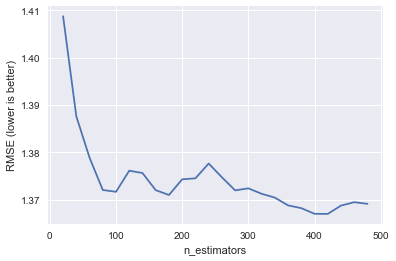

In [107]:
# plot n_estimators (x-axis) versus RMSE (y-axis)
plt.plot(estimator_range, RMSE_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE (lower is better)')

In [111]:
# list of values to try for max_features
feature_range = range(1, len(list(X))+1)

# list to store the average RMSE for each value of max_features
RMSE_scores = []

for feature in feature_range:
    rfreg = RandomForestRegressor(n_estimators=400, bootstrap=True, 
                                  oob_score=True, max_features=feature, random_state=1234)
    rfreg.fit(X_train,y_train)
    preds = rfreg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    RMSE_scores.append(rmse)

Text(0,0.5,'RMSE (lower is better)')

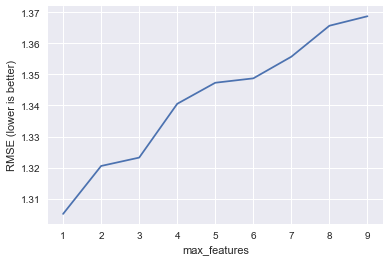

In [112]:
# plot n_estimators (x-axis) versus RMSE (y-axis)
plt.plot(feature_range, RMSE_scores)
plt.xlabel('max_features')
plt.ylabel('RMSE (lower is better)')

In [114]:
rfreg_best = RandomForestRegressor(n_estimators=500, max_features=1, bootstrap=True, oob_score=True, random_state=123)
rfreg_best.fit(X_train,y_train)
preds = rfreg_best.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("Best RMSE:",rmse)

Best RMSE: 1.30782188972


In [116]:
# compute feature importances
pd.DataFrame({'feature':list(X), 'importance':rfreg_best.feature_importances_})

,feature,importance
0,Org_size,0.128367
1,Age,0.205992
2,Gender_cat,0.048301
3,Emp_PH,0.135354
4,Emp_MH,0.145676
5,Willingness,0.204896
6,Emp_type,0.023812
7,Role,0.016683
8,Tech_support,0.090919


In [54]:
X_train.head()

,Org_size,Age,Gender_cat,Emp_PH,Emp_MH,Willingness,Emp_type,Role,Tech_support
557,250.0,34.0,4,10.0,8.0,6,1.0,1.0,4.0
657,75.0,50.0,4,3.0,3.0,9,1.0,1.0,3.0
754,75.0,30.0,4,6.0,4.0,2,1.0,1.0,2.0
392,1000.0,41.0,3,7.0,7.0,0,0.0,1.0,3.0
731,75.0,28.0,4,5.0,5.0,0,1.0,1.0,5.0
